# MARATONA BEHIND THE CODE 2020

## DESAFIO 2: UNINASSAU

In [1]:
!pip install imblearn --upgrade

Requirement already up-to-date: imblearn in /opt/conda/envs/Python36/lib/python3.6/site-packages (0.0)


In [2]:
!pip install imbalanced-learn==0.4.3

In [3]:
!pip install scikit-learn==0.22

In [4]:
!pip install xgboost --upgrade

Requirement already up-to-date: xgboost in /opt/conda/envs/Python36/lib/python3.6/site-packages (1.2.0)


### Instalando bibliotecas

In [5]:
# Em seguida iremos importar diversas bibliotecas que serão utilizadas:

# Pacote para trabalhar com JSON
import json

# Pacote para realizar requisições HTTP
import requests

# Pacote para exploração e análise de dados
import pandas as pd

# Pacote com métodos numéricos e representações matriciais
import numpy as np

# Pacote para construção de modelo baseado na técnica Gradient Boosting
import xgboost as xgb

# Pacotes do scikit-learn para pré-processamento de dados
# "SimpleImputer" é uma transformação para preencher valores faltantes em conjuntos de dados
from sklearn.impute import SimpleImputer

# Pacotes do scikit-learn para treinamento de modelos e construção de pipelines
# Método para separação de conjunto de dados em amostras de treino e teste
from sklearn.model_selection import train_test_split
# Classe para a criação de uma pipeline de machine-learning
from sklearn.pipeline import Pipeline

# Pacotes do scikit-learn para avaliação de modelos
# Métodos para validação cruzada do modelo criado
from sklearn.model_selection import KFold, cross_validate

## Download dos conjuntos de dados em formato .csv

In [6]:
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/maratonadev-br/desafio-2-2020/master/Assets/Data/dataset_desafio_2.csv
df_training_dataset = pd.read_csv(r'dataset_desafio_2.csv')
df_training_dataset.tail()

--2020-09-20 21:48:51--  https://raw.githubusercontent.com/maratonadev-br/desafio-2-2020/master/Assets/Data/dataset_desafio_2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 199.232.8.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|199.232.8.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1500234 (1.4M) [text/plain]
Saving to: ‘dataset_desafio_2.csv.2’

100%[======================================>] 1,500,234   --.-K/s   in 0.05s   

2020-09-20 21:48:51 (30.9 MB/s) - ‘dataset_desafio_2.csv.2’ saved [1500234/1500234]



,MATRICULA,NOME,REPROVACOES_DE,REPROVACOES_EM,REPROVACOES_MF,REPROVACOES_GO,NOTA_DE,NOTA_EM,NOTA_MF,NOTA_GO,INGLES,H_AULA_PRES,TAREFAS_ONLINE,FALTAS,PERFIL
19995,856673,Laércio Mário da Silva,0,0,0,0,7.0,7.9,5.8,7.0,1.0,9,5,6,EXATAS
19996,576100,Cibele Quésia Poza,1,1,1,1,0.0,0.0,0.0,NaN,1.0,3,2,5,DIFICULDADE
19997,888739,Marcielle Chale Bape,0,0,0,0,7.9,7.6,8.3,7.2,NaN,8,3,1,EXCELENTE
19998,722743,Suzanne Mirian Mourão,0,0,1,1,6.3,5.1,0.0,0.0,1.0,3,2,6,DIFICULDADE
19999,417268,Maria Isaiane da Silva Luwequisman,0,0,1,1,7.0,7.3,0.0,0.0,NaN,3,0,6,DIFICULDADE


Temos 15 colunas presentes no dataset fornecido, sendo dezessete delas variáveis características (dados de entrada) e um delas uma variável-alvo (que queremos que o nosso modelo seja capaz de prever). 

As variáveis características são:

    MATRICULA       - número de matrícula do estudante
    NOME            - nome completo do estudante
    REPROVACOES_DE  - número de reprovações na disciplina de ``Direito Empresarial``
    REPROVACOES_EM  - número de reprovações na disciplina de ``Empreendedorismo``
    REPROVACOES_MF  - número de reprovações na disciplina de ``Matemática Financeira``
    REPROVACOES_GO  - número de reprovações na disciplina de ``Gestão Operacional``
    NOTA_DE         - média simples das notas do aluno na disciplina de ``Direito Empresarial`` (0-10)
    NOTA_EM         - média simples das notas do aluno na disciplina de ``Empreendedorismo`` (0-10)
    NOTA_MF         - média simples das notas do aluno na disciplina de ``Matemática Financeira`` (0-10)
    NOTA_GO         - média simples das notas do aluno na disciplina de ``Gestão Operacional`` (0-10)
    INGLES          - variável binária que indica se o estudante tem conhecimento em língua inglesa (0 -> sim ou 1 -> não).
    H_AULA_PRES     - horas de estudo presencial realizadas pelo estudante
    TAREFAS_ONLINE  - número de tarefas online entregues pelo estudante
    FALTAS          - número de faltas acumuladas do estudante (todas disciplinas)
    
A variável-alvo é:

    PERFIL               - uma *string* que indica uma de cinco possibilidades: 
        "EXCELENTE"      - Estudante não necessita de mentoria
        "MUITO BOM"      - Estudante não necessita de mentoria
        "HUMANAS"        - Estudante necessita de mentoria exclusivamente em matérias com conteúdo de ciências humanas
        "EXATAS"         - Estudante necessita de mentoria apenas em disciplinas com conteúdo de ciências exatas
        "DIFICULDADE"    - Estudante necessita de mentoria em duas ou mais disciplinas
        
Com um modelo capaz de classificar um estudante em uma dessas categorias, podemos automatizar parte da mentoria estudantil através de assistentes virtuais, que serão capazes de recomendar práticas de estudo e conteúdo personalizado com base nas necessidades de cada aluno.

### Explorando os dados fornecidos

Podemos continuar a exploração dos dados fornecidos com a função ``info()``:

In [7]:
df_training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
MATRICULA         20000 non-null int64
NOME              20000 non-null object
REPROVACOES_DE    20000 non-null int64
REPROVACOES_EM    20000 non-null int64
REPROVACOES_MF    20000 non-null int64
REPROVACOES_GO    20000 non-null int64
NOTA_DE           20000 non-null float64
NOTA_EM           20000 non-null float64
NOTA_MF           20000 non-null float64
NOTA_GO           16284 non-null float64
INGLES            16372 non-null float64
H_AULA_PRES       20000 non-null int64
TAREFAS_ONLINE    20000 non-null int64
FALTAS            20000 non-null int64
PERFIL            20000 non-null object
dtypes: float64(5), int64(8), object(2)
memory usage: 2.3+ MB


É notado que existem variáveis do tipo ``float64`` (números "decimais"), variáveis do tipo ``int64`` (números inteiros) e do tipo ``object`` (nesse caso são *strings*, ou texto). 

Como a maioria dos algoritmos de aprendizado estatístico supervisionado só aceita valores numéricos como entrada, é necessário então o pré-processamento das variáveis do tipo "object" antes de usar esse dataset como entrada para o treinamento de um modelo. Também é notado que existem valores faltantes em várias colunas. Esses valores faltantes também devem ser tratados antes de serem construídos modelos com esse conjunto de dados base.

A função ``describe()`` gera várias informações sobre as variáveis numéricas que também podem ser úteis:

In [8]:
df_training_dataset.describe()

,MATRICULA,REPROVACOES_DE,REPROVACOES_EM,REPROVACOES_MF,REPROVACOES_GO,NOTA_DE,NOTA_EM,NOTA_MF,NOTA_GO,INGLES,H_AULA_PRES,TAREFAS_ONLINE,FALTAS
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,16284.000000,16372.000000,20000.000000,20000.000000,20000.000000
mean,551148.271400,0.242850,0.242850,0.297650,0.293350,5.196560,5.080285,4.817630,4.534101,0.646286,5.102950,3.140300,4.060600
std,259488.766584,0.615055,0.615055,0.672813,0.661829,2.522545,2.523928,2.734775,2.509209,0.478136,4.118422,1.854909,1.674714
min,100003.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,326554.250000,0.000000,0.000000,0.000000,0.000000,5.200000,4.900000,4.700000,4.500000,0.000000,2.000000,2.000000,3.000000
50%,550630.000000,0.000000,0.000000,0.000000,0.000000,6.200000,5.900000,5.500000,5.400000,1.000000,4.000000,3.000000,4.000000
75%,775524.750000,0.000000,0.000000,0.000000,0.000000,6.700000,6.700000,6.500000,6.200000,1.000000,6.000000,5.000000,6.000000
max,999995.000000,3.000000,3.000000,3.000000,3.000000,9.000000,9.400000,11.500000,10.000000,1.000000,25.000000,7.000000,8.000000


### Visualizações

Vizualização gráfica do dataset fornecido

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

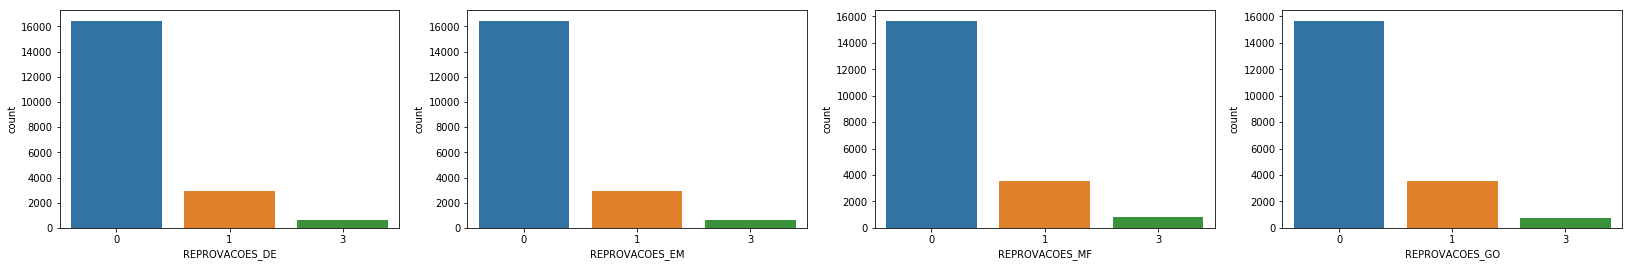

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(28, 4))

sns.countplot(ax=axes[0], x='REPROVACOES_DE', data=df_training_dataset)
sns.countplot(ax=axes[1], x='REPROVACOES_EM', data=df_training_dataset)
sns.countplot(ax=axes[2], x='REPROVACOES_MF', data=df_training_dataset)
sns.countplot(ax=axes[3], x='REPROVACOES_GO', data=df_training_dataset)

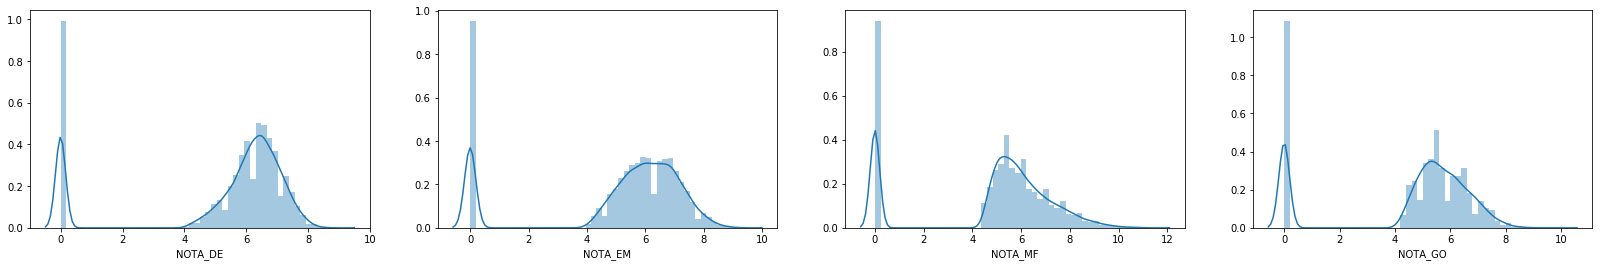

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(28, 4))

sns.distplot(df_training_dataset['NOTA_DE'], ax=axes[0])
sns.distplot(df_training_dataset['NOTA_EM'], ax=axes[1])
sns.distplot(df_training_dataset['NOTA_MF'], ax=axes[2])
sns.distplot(df_training_dataset['NOTA_GO'].dropna(), ax=axes[3])

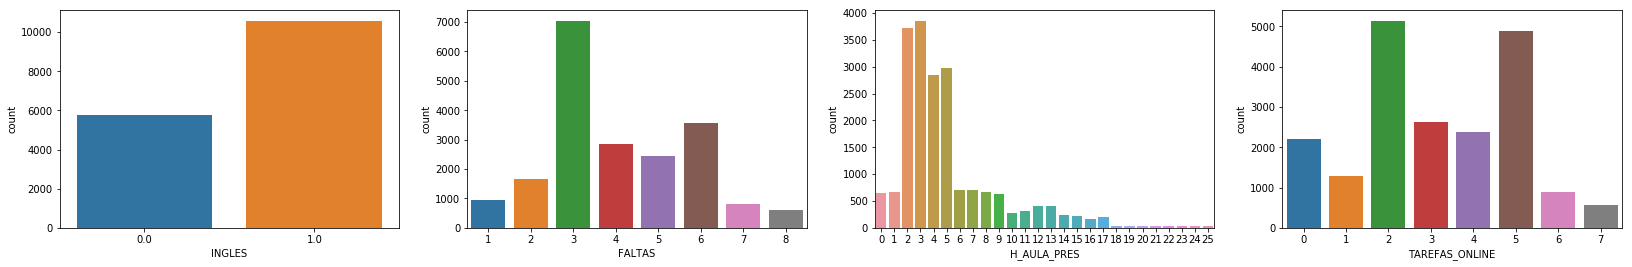

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(28, 4))

sns.countplot(ax=axes[0], x='INGLES', data=df_training_dataset)
sns.countplot(ax=axes[1], x='FALTAS', data=df_training_dataset)
sns.countplot(ax=axes[2], x='H_AULA_PRES', data=df_training_dataset)
sns.countplot(ax=axes[3], x='TAREFAS_ONLINE', data=df_training_dataset)

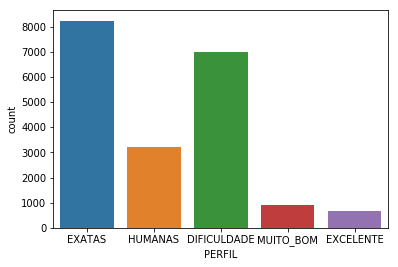

In [13]:
fig = plt.plot()
sns.countplot(x='PERFIL', data=df_training_dataset)

###### Boxplots

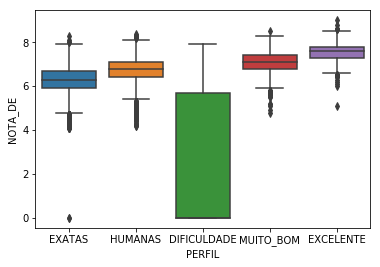

In [14]:
plt.figure()
ax = sns.boxplot(x=df_training_dataset['PERFIL'], y=df_training_dataset['NOTA_DE'])

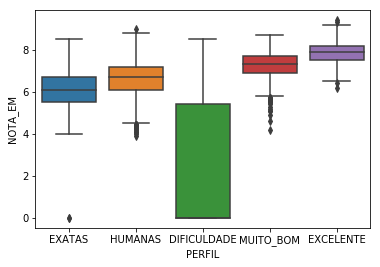

In [15]:
plt.figure()
ax = sns.boxplot(x=df_training_dataset['PERFIL'], y=df_training_dataset['NOTA_EM'])

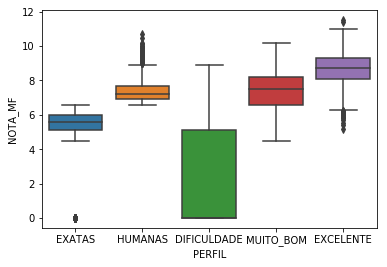

In [16]:
plt.figure()
ax = sns.boxplot(x=df_training_dataset['PERFIL'], y=df_training_dataset['NOTA_MF'])

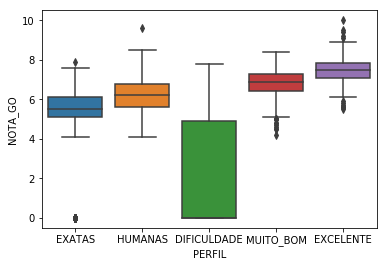

In [17]:
plt.figure()
ax = sns.boxplot(x=df_training_dataset['PERFIL'], y=df_training_dataset['NOTA_GO'])

#### Verificando as correlações

In [18]:
df_training_dataset.corr()

,MATRICULA,REPROVACOES_DE,REPROVACOES_EM,REPROVACOES_MF,REPROVACOES_GO,NOTA_DE,NOTA_EM,NOTA_MF,NOTA_GO,INGLES,H_AULA_PRES,TAREFAS_ONLINE,FALTAS
MATRICULA,1.000000,-0.007681,-0.010415,-0.010435,-0.014064,0.010366,0.009687,0.008253,0.013927,-0.001675,0.008386,-0.008959,-0.006903
REPROVACOES_DE,-0.007681,1.000000,0.718194,0.627279,0.635341,-0.813435,-0.794798,-0.692948,-0.710445,0.056715,-0.055391,-0.085484,0.094888
REPROVACOES_EM,-0.010415,0.718194,1.000000,0.630179,0.626988,-0.813435,-0.794798,-0.692389,-0.710117,0.060648,-0.065024,-0.086449,0.097509
REPROVACOES_MF,-0.010435,0.627279,0.630179,1.000000,0.716056,-0.724459,-0.713168,-0.779373,-0.801010,0.065121,-0.064817,-0.090557,0.102211
REPROVACOES_GO,-0.014064,0.635341,0.626988,0.716056,1.000000,-0.723049,-0.713200,-0.780861,-0.801819,0.069652,-0.069179,-0.090917,0.107030
NOTA_DE,0.010366,-0.813435,-0.813435,-0.724459,-0.723049,1.000000,0.969557,0.850942,0.867028,-0.106027,0.157820,0.158549,-0.176007
NOTA_EM,0.009687,-0.794798,-0.794798,-0.713168,-0.713200,0.969557,1.000000,0.853037,0.869426,-0.115077,0.175144,0.167702,-0.178978
NOTA_MF,0.008253,-0.692948,-0.692389,-0.779373,-0.780861,0.850942,0.853037,1.000000,0.948487,-0.128408,0.213406,0.186934,-0.200538
NOTA_GO,0.013927,-0.710445,-0.710117,-0.801010,-0.801819,0.867028,0.869426,0.948487,1.000000,-0.116421,0.181685,0.169990,-0.180111
INGLES,-0.001675,0.056715,0.060648,0.065121,0.069652,-0.106027,-0.115077,-0.128408,-0.116421,1.000000,-0.174072,-0.149433,0.141218


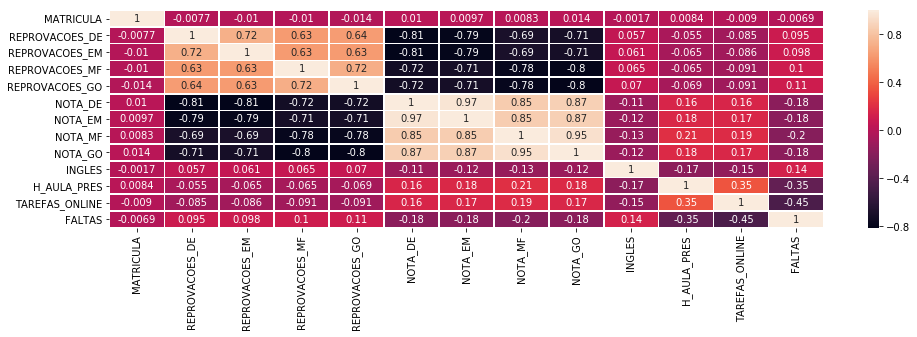

In [19]:
plt.figure(figsize=(16, 4))
corr = df_training_dataset.corr()

sns.heatmap(df_training_dataset.corr(), annot=True, linewidths=0.5)
plt.xticks(rotation=90)
plt.show()

### Realizando o pré-processamento dos dados

#### Transformação 1: excluindo colunas do dataset

Para a criação de uma transformação de dados personalizada no scikit-learn, é necessária basicamente a criação de uma classe com os métodos ``transform`` e ``fit``. No método transform será executada a lógica da nossa transformação.

Na próxima célula é apresentado o código completo de uma transformação ``DropColumns`` para a remoção de colunas de um DataFrame pandas.

A primeira transformação (passo na nossa Pipeline) será a exclusão da coluna "NOME" do nosso dataset, que além de não ser uma variável numérica, também não é uma variável relacionada ao desempenho dos estudantes nas disciplinas. Existem funções prontas no scikit-learn para a realização dessa transformação, entretanto nosso exemplo irá demonstrar como criar uma transformação personalizada do zero no scikit-learn. Se desejado, o participante poderá utilizar esse exemplo para criar outras transformações e adicioná-las à Pipeline final :)

A segunda transformação será a exclusão da coluna "MATRICULA" do nosso dataset, pois não é uma variável relacionada ao desempenho dos estudantes nas disciplinas, e sim criada aleatoriamente para guardar as informações de cada usuário, que neste caso nós não precisaremos dela

Pensei bastante a respeito e retirar a coluna "FALTAS" porém pensei melhor e levei em consideração que se uma pessoa falta muito em uma máteria o seu desempenho acadêmico pode piorar, então decidi não retirar.

In [20]:
from sklearn.base import BaseEstimator, TransformerMixin


# All sklearn Transforms must have the `transform` and `fit` methods
class DropColumns(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # Primeiro realizamos a cópia do dataframe 'X' de entrada
        data = X.copy()
        # Retornamos um novo dataframe sem as colunas indesejadas
        return data.drop(labels=self.columns, axis='columns')

#### Transformação 1: excluindo colunas do dataset

Para a criação de uma transformação de dados personalizada no scikit-learn, é necessária basicamente a criação de uma classe com os métodos ``transform`` e ``fit``. No método transform será executada a lógica da nossa transformação.

Na próxima célula é apresentado o código completo de uma transformação ``DropColumns`` para a remoção de colunas de um DataFrame pandas.

In [21]:
# Instanciando uma transformação DropColumns
rm_columns = DropColumns(
    columns=["MATRICULA", "NOME"]  # Essa transformação recebe como parâmetro uma lista com os nomes das colunas indesejadas
)

print(rm_columns)

DropColumns(columns=['MATRICULA', 'NOME'])


In [22]:
# Visualizando as colunas do dataset original
print("Colunas do dataset original: \n")
print(df_training_dataset.columns)

Colunas do dataset original: 

Index(['MATRICULA', 'NOME', 'REPROVACOES_DE', 'REPROVACOES_EM',
       'REPROVACOES_MF', 'REPROVACOES_GO', 'NOTA_DE', 'NOTA_EM', 'NOTA_MF',
       'NOTA_GO', 'INGLES', 'H_AULA_PRES', 'TAREFAS_ONLINE', 'FALTAS',
       'PERFIL'],
      dtype='object')


In [23]:
# Aplicando a transformação ``DropColumns`` ao conjunto de dados base
rm_columns.fit(X=df_training_dataset)

# Reconstruindo um DataFrame Pandas com o resultado da transformação
df_training_dataset_2 = pd.DataFrame.from_records(
    data=rm_columns.transform(
        X=df_training_dataset
    ),
)

In [24]:
# Visualizando as colunas do dataset transformado
print("Colunas do dataset após a transformação ``DropColumns``: \n")
print(df_training_dataset_2.columns)

Colunas do dataset após a transformação ``DropColumns``: 

Index(['REPROVACOES_DE', 'REPROVACOES_EM', 'REPROVACOES_MF', 'REPROVACOES_GO',
       'NOTA_DE', 'NOTA_EM', 'NOTA_MF', 'NOTA_GO', 'INGLES', 'H_AULA_PRES',
       'TAREFAS_ONLINE', 'FALTAS', 'PERFIL'],
      dtype='object')


Nota-se que a coluna "NOME" e a coluna "MATRICULA" foram removidas e nosso dataset agora possui apenas 16 colunas.

#### Transformação 2: tratando dados faltantes

Para tratar os dados faltantes em nosso conjunto de dados, iremos agora utilizar uma transformação pronta da biblioteca scikit-learn, chamada **SimpleImputer**.

Essa transformação permite diversas estratégias para o tratamento de dados faltantes. A documentação oficial pode ser encontrada em: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

Neste exemplo iremos simplesmente transformar todos os valores faltantes em zero.

In [25]:
# Visualizando os dados faltantes do dataset após a primeira transformação (df_data_2)
print("Valores nulos antes da transformação SimpleImputer: \n\n{}\n".format(df_training_dataset_2.isnull().sum(axis = 0)))

Valores nulos antes da transformação SimpleImputer: 

REPROVACOES_DE       0
REPROVACOES_EM       0
REPROVACOES_MF       0
REPROVACOES_GO       0
NOTA_DE              0
NOTA_EM              0
NOTA_MF              0
NOTA_GO           3716
INGLES            3628
H_AULA_PRES          0
TAREFAS_ONLINE       0
FALTAS               0
PERFIL               0
dtype: int64



In [26]:
# Visualizando os dados faltantes do dataset após a primeira transformação em probabilidade (df_data_2)
df_training_dataset_2.isnull().sum() / len(df_training_dataset_2) * 100

REPROVACOES_DE     0.00
REPROVACOES_EM     0.00
REPROVACOES_MF     0.00
REPROVACOES_GO     0.00
NOTA_DE            0.00
NOTA_EM            0.00
NOTA_MF            0.00
NOTA_GO           18.58
INGLES            18.14
H_AULA_PRES        0.00
TAREFAS_ONLINE     0.00
FALTAS             0.00
PERFIL             0.00
dtype: float64

#### Transformando os dados faltantes por 0 e pela média
De ínicio eu iria alterar pela média de todos os alunos, porém pensei melhor a respeito e quando está NaN quer dizer que o aluno faltou na prova, com isso, pelas regras de négocio o melhor a se fazer era colocar 0 para os alunos que faltaram. 
Depois de inúmeros testes cheguei a conclusão que zerar o conjunto de NaN foi a melhor opção.

In [27]:
df_training_dataset_2[df_training_dataset_2['NOTA_GO'].isnull() == True].head()

,REPROVACOES_DE,REPROVACOES_EM,REPROVACOES_MF,REPROVACOES_GO,NOTA_DE,NOTA_EM,NOTA_MF,NOTA_GO,INGLES,H_AULA_PRES,TAREFAS_ONLINE,FALTAS,PERFIL
13,3,1,1,1,0.0,0.0,0.0,NaN,0.0,6,5,3,DIFICULDADE
26,0,0,0,0,7.2,7.4,8.1,NaN,1.0,3,5,2,HUMANAS
27,0,0,0,0,4.5,4.9,5.5,NaN,1.0,5,2,6,DIFICULDADE
36,0,0,0,0,6.6,6.9,5.2,NaN,NaN,15,5,5,EXATAS
37,0,0,0,0,6.4,5.7,5.0,NaN,0.0,5,5,3,EXATAS


In [28]:
df_training_dataset_2['NOTA_GO'].fillna(0, inplace = True)

In [29]:
df_training_dataset_2[df_training_dataset_2['NOTA_GO'].isnull() == True].head()

,REPROVACOES_DE,REPROVACOES_EM,REPROVACOES_MF,REPROVACOES_GO,NOTA_DE,NOTA_EM,NOTA_MF,NOTA_GO,INGLES,H_AULA_PRES,TAREFAS_ONLINE,FALTAS,PERFIL


In [30]:
df_training_dataset_2[df_training_dataset_2['INGLES'].isnull() == True].head()

,REPROVACOES_DE,REPROVACOES_EM,REPROVACOES_MF,REPROVACOES_GO,NOTA_DE,NOTA_EM,NOTA_MF,NOTA_GO,INGLES,H_AULA_PRES,TAREFAS_ONLINE,FALTAS,PERFIL
7,0,0,0,0,4.9,5.0,5.9,4.6,NaN,2,2,6,DIFICULDADE
11,3,1,1,1,0.0,0.0,0.0,0.0,NaN,0,1,7,DIFICULDADE
12,1,1,1,1,0.0,0.0,0.0,0.0,NaN,7,5,5,DIFICULDADE
14,1,3,1,1,0.0,0.0,0.0,0.0,NaN,5,2,6,DIFICULDADE
21,0,0,0,0,7.0,7.4,7.3,7.0,NaN,15,5,2,HUMANAS


In [31]:
df_training_dataset_2['INGLES'].fillna(0, inplace = True)

In [32]:
df_training_dataset_2[df_training_dataset_2['INGLES'].isnull() == True]

,REPROVACOES_DE,REPROVACOES_EM,REPROVACOES_MF,REPROVACOES_GO,NOTA_DE,NOTA_EM,NOTA_MF,NOTA_GO,INGLES,H_AULA_PRES,TAREFAS_ONLINE,FALTAS,PERFIL


In [33]:
# Visualizando os dados faltantes do dataset após a segunda transformação (df_data_2)
print("Valores nulos no dataset após a transformação SimpleImputer: \n\n{}\n".format(df_training_dataset_2.isnull().sum(axis = 0)))

Valores nulos no dataset após a transformação SimpleImputer: 

REPROVACOES_DE    0
REPROVACOES_EM    0
REPROVACOES_MF    0
REPROVACOES_GO    0
NOTA_DE           0
NOTA_EM           0
NOTA_MF           0
NOTA_GO           0
INGLES            0
H_AULA_PRES       0
TAREFAS_ONLINE    0
FALTAS            0
PERFIL            0
dtype: int64



Nota-se que não temos mais nenhum valor faltante no nosso conjunto de dados :)

##### Coluna inglês do tipo dummy
Preferi manter a coluna inglês, porém coloquei ela do tipo dummy, que não terá relevância na base de dados

In [34]:
df_training_dataset_2 = pd.get_dummies(df_training_dataset_2, columns=['INGLES'])

#### Definindo as features do modelo

In [35]:
df_training_dataset_2.columns

Index(['REPROVACOES_DE', 'REPROVACOES_EM', 'REPROVACOES_MF', 'REPROVACOES_GO',
       'NOTA_DE', 'NOTA_EM', 'NOTA_MF', 'NOTA_GO', 'H_AULA_PRES',
       'TAREFAS_ONLINE', 'FALTAS', 'PERFIL', 'INGLES_0.0', 'INGLES_1.0'],
      dtype='object')

In [36]:
# Definição das colunas que serão features (nota-se que a coluna NOME não está presente)
features = [
    'REPROVACOES_DE', 'REPROVACOES_EM', 'REPROVACOES_MF', 'REPROVACOES_GO',
    'NOTA_DE', 'NOTA_EM', 'NOTA_MF', 'NOTA_GO', 'H_AULA_PRES',
    'TAREFAS_ONLINE', 'FALTAS', 'INGLES_0.0', 'INGLES_1.0'
]

# Definição da variável-alvo
target = ["PERFIL"]

# Preparação dos argumentos para os métodos da biblioteca ``scikit-learn``
X = df_training_dataset_2[features]
y = df_training_dataset_2[target]

O conjunto de entrada (X):

In [37]:
X.head()

,REPROVACOES_DE,REPROVACOES_EM,REPROVACOES_MF,REPROVACOES_GO,NOTA_DE,NOTA_EM,NOTA_MF,NOTA_GO,H_AULA_PRES,TAREFAS_ONLINE,FALTAS,INGLES_0.0,INGLES_1.0
0,0,0,0,0,6.2,5.8,4.6,5.9,2,4,3,1,0
1,0,0,0,0,6.0,6.2,5.2,4.5,2,4,3,0,1
2,0,0,0,0,7.3,6.7,7.1,7.2,5,0,3,1,0
3,1,3,1,1,0.0,0.0,0.0,0.0,4,4,4,0,1
4,1,3,1,1,0.0,0.0,0.0,0.0,5,2,5,0,1


As variáveis-alvo correspondentes (y):

In [38]:
y['PERFIL'].unique()

array(['EXATAS', 'HUMANAS', 'DIFICULDADE', 'MUITO_BOM', 'EXCELENTE'],
      dtype=object)

#### Gráficos da classe 'PERFIL' antes do balanceamento dos dados
Notamos que o conjunto de dados da coluna 'PERFIL' está desbalanceada, e para isso utilizaremos técnicas para balanceamento.

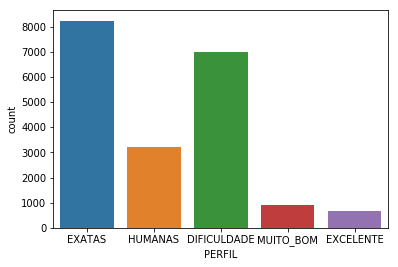

In [39]:
sns.countplot(x='PERFIL', data=df_training_dataset)

### Balanceamento dos dados da coluna 'TARGET'

#### SMOTE

In [40]:
from imblearn.over_sampling import SMOTE

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [41]:
# sampling_strategy = 0.5
smt = SMOTE(sampling_strategy='not majority')

In [42]:
X, y = smt.fit_sample(X, y)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be 

#### Gráficos da classe 'PERFIL' após o balanceamento dos dados
Aqui, podemos notar que o balanceamento foi feito com sucesso, assim o treinamento ficará mais eficaz.

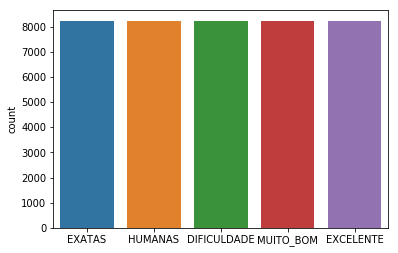

In [43]:
sns.countplot(x=y, data=df_training_dataset)

<hr>

### Treinando os modelos de classificação

Finalizado o pré-processamento, já temos o conjunto de dados no formato necessário para o treinamento do nosso modelo:

#### Separando o dataset em um conjunto de treino e um conjunto de teste

Iremos separar o dataset fornecido em dois grupos: um para treinar nosso modelo, e outro para testarmos o resultado através de um teste cego.

In [44]:
# Separação dos dados em um conjunto de treino e um conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=337)

<hr>

#### Importações dos algortimos de ML

In [45]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# Regressão Logistica
from sklearn.linear_model import LogisticRegression
# kNN (vizinhos mais próximos)
from sklearn.neighbors import KNeighborsClassifier
# SVM (Máquinas de vetores de suporte)
from sklearn.svm import SVC
# Redes neurais artificiais
from sklearn.neural_network import MLPClassifier
# Outros
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

<hr>

#### Matriz de confusão

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

<hr>

#### Nesta parte foi feito a configuração de todos os algoritmos usados
Para isso, foi feito um teste com todos os algoritmos para tornâ-los com resultados mais relevantes alterando as suas métricas

### Decision Tree

In [47]:
decision_tree = DecisionTreeClassifier()

In [48]:
decision_tree.fit(X_train, y_train)

y_pred_dt = decision_tree.predict(X_test)

In [49]:
from sklearn.metrics import accuracy_score

# Acurácia alcançada pelo algortimo árvore de decisão
print("Acurácia: {}%".format(100*round(accuracy_score(y_test, y_pred_dt), 2)))

Acurácia: 79.0%


In [50]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

 DIFICULDADE       0.76      0.78      0.77      2463
      EXATAS       0.77      0.73      0.75      2533
   EXCELENTE       0.87      0.88      0.88      2443
     HUMANAS       0.82      0.81      0.81      2428
   MUITO_BOM       0.75      0.76      0.76      2478

    accuracy                           0.79     12345
   macro avg       0.79      0.79      0.79     12345
weighted avg       0.79      0.79      0.79     12345



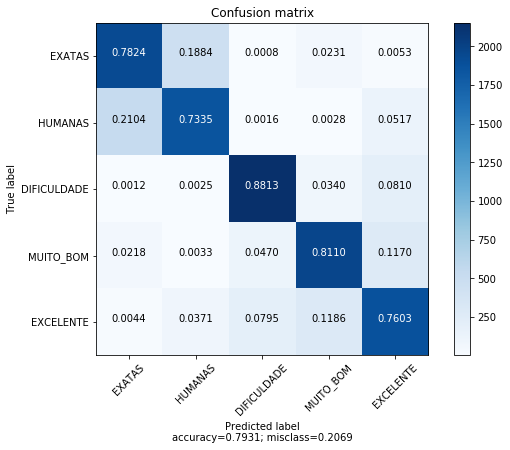

In [51]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred_dt), ['EXATAS', 'HUMANAS', 'DIFICULDADE', 'MUITO_BOM', 'EXCELENTE'])

<hr>

### Random Forest

In [52]:
random_forest = RandomForestClassifier(n_estimators=100, max_depth=110, max_features=3, criterion='entropy', random_state=0)

In [53]:
random_forest.fit(X_train, y_train)

y_pred_random = random_forest.predict(X_test)

In [54]:
# Acurácia alcançada pelo algoritmo Random Forest
print("Acurácia: {}%".format(100*round(accuracy_score(y_test, y_pred_random), 2)))

Acurácia: 88.0%


In [55]:
print(classification_report(y_test, y_pred_random))

              precision    recall  f1-score   support

 DIFICULDADE       0.88      0.77      0.82      2463
      EXATAS       0.80      0.88      0.84      2533
   EXCELENTE       0.91      0.97      0.94      2443
     HUMANAS       0.89      0.91      0.90      2428
   MUITO_BOM       0.92      0.85      0.88      2478

    accuracy                           0.88     12345
   macro avg       0.88      0.88      0.88     12345
weighted avg       0.88      0.88      0.88     12345



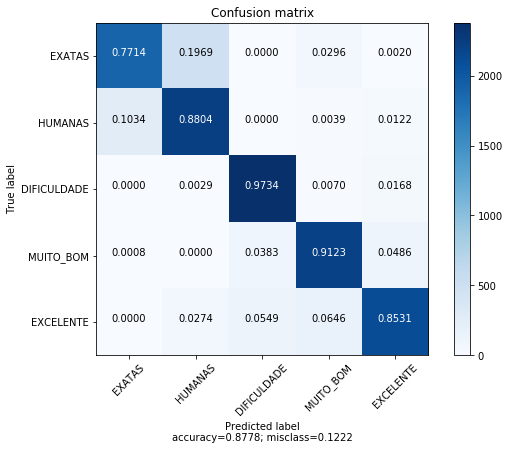

In [56]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred_random), ['EXATAS', 'HUMANAS', 'DIFICULDADE', 'MUITO_BOM', 'EXCELENTE'])

<hr>

### XGBOOST

In [57]:
xg = xgb.XGBClassifier(
    silent=False, 
    nthread=-1,
    learning_rate =0.3,
    n_estimators=123,
    max_depth=7,
    gamma=0,
    subsample=0.6,
    colsample_bytree=0.8,
    objective= 'multi:softmax',
    num_class=5)

In [58]:
xg.fit(X_train, y_train)

y_pred_xg = xg.predict(X_test)

[21:49:25] WARNING: ../src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [59]:
# Acurácia alcançada pelo algoritmo SVM (Máquinas de vetores de suporte)
print("Acurácia: {}%".format(100*round(accuracy_score(y_test, y_pred_xg), 2)))

Acurácia: 87.0%


In [60]:
print(classification_report(y_test, y_pred_xg))

              precision    recall  f1-score   support

 DIFICULDADE       0.87      0.79      0.82      2463
      EXATAS       0.81      0.88      0.84      2533
   EXCELENTE       0.90      0.95      0.93      2443
     HUMANAS       0.87      0.89      0.88      2428
   MUITO_BOM       0.88      0.83      0.86      2478

    accuracy                           0.87     12345
   macro avg       0.87      0.87      0.87     12345
weighted avg       0.87      0.87      0.87     12345



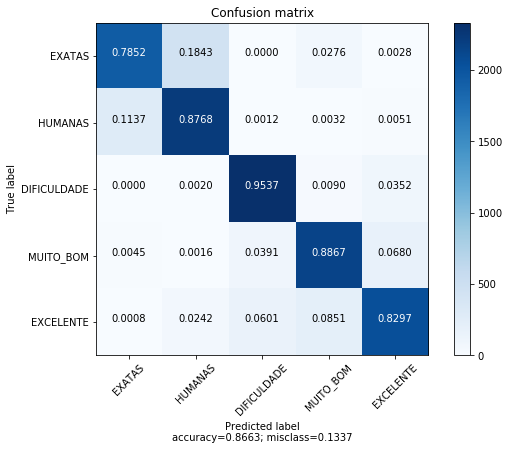

In [61]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred_xg), ['EXATAS', 'HUMANAS', 'DIFICULDADE', 'MUITO_BOM', 'EXCELENTE'])

<hr>

### Logistic Regression

In [62]:
reg = LogisticRegression()

In [63]:
reg.fit(X_train, y_train)

y_pred_reg = reg.predict(X_test)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [64]:
# Acurácia alcançada pela Regressão Logistica
print("Acurácia: {}%".format(100*round(accuracy_score(y_test, y_pred_reg), 2)))

Acurácia: 62.0%


In [65]:
print(classification_report(y_test, y_pred_reg))

              precision    recall  f1-score   support

 DIFICULDADE       0.91      0.66      0.77      2463
      EXATAS       0.63      0.75      0.69      2533
   EXCELENTE       0.63      0.74      0.68      2443
     HUMANAS       0.57      0.58      0.58      2428
   MUITO_BOM       0.42      0.37      0.39      2478

    accuracy                           0.62     12345
   macro avg       0.63      0.62      0.62     12345
weighted avg       0.63      0.62      0.62     12345



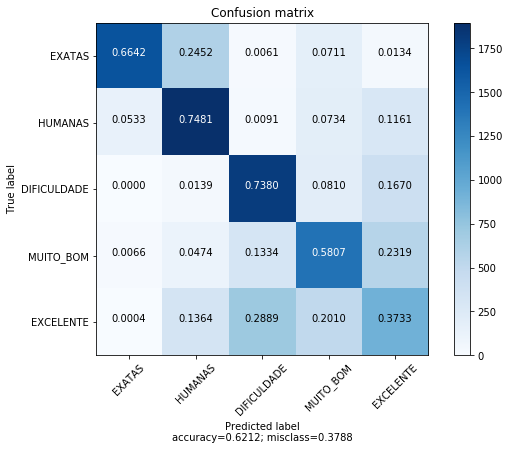

In [66]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred_reg), ['EXATAS', 'HUMANAS', 'DIFICULDADE', 'MUITO_BOM', 'EXCELENTE'])

<hr>

### kNN (Vizinhos mais próximos)

In [67]:
knn = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2)

In [68]:
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

In [69]:
# Acurácia alcançada pelo algoritmo kNN
print("Acurácia: {}%".format(100*round(accuracy_score(y_test, y_pred_knn), 2)))

Acurácia: 83.0%


In [70]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

 DIFICULDADE       0.84      0.79      0.82      2463
      EXATAS       0.78      0.72      0.75      2533
   EXCELENTE       0.88      0.98      0.93      2443
     HUMANAS       0.85      0.78      0.81      2428
   MUITO_BOM       0.80      0.90      0.85      2478

    accuracy                           0.83     12345
   macro avg       0.83      0.83      0.83     12345
weighted avg       0.83      0.83      0.83     12345



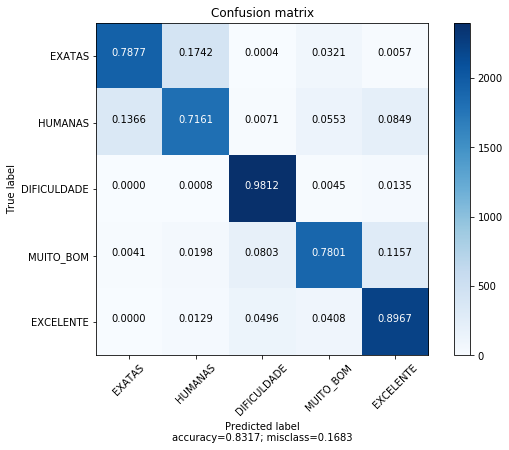

In [71]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred_knn), ['EXATAS', 'HUMANAS', 'DIFICULDADE', 'MUITO_BOM', 'EXCELENTE'])

<hr>

### SVM (Máquinas de vetores de suporte)

In [72]:
svm = SVC(C = 2.0, random_state = 1)

In [73]:
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

In [74]:
# Acurácia alcançada pelo algoritmo SVM (Máquinas de vetores de suporte)
print("Acurácia: {}%".format(100*round(accuracy_score(y_test, y_pred_svm), 2)))

Acurácia: 72.0%


In [75]:
# View the classification report for test data and predictions
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

 DIFICULDADE       0.93      0.71      0.81      2463
      EXATAS       0.72      0.85      0.78      2533
   EXCELENTE       0.73      0.84      0.78      2443
     HUMANAS       0.73      0.69      0.71      2428
   MUITO_BOM       0.52      0.49      0.50      2478

    accuracy                           0.72     12345
   macro avg       0.73      0.72      0.72     12345
weighted avg       0.73      0.72      0.72     12345



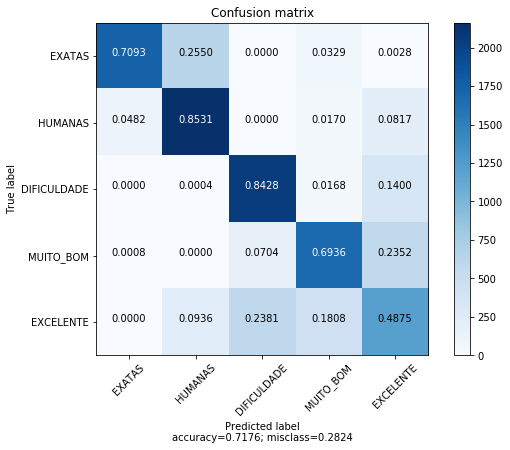

In [76]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred_svm), ['EXATAS', 'HUMANAS', 'DIFICULDADE', 'MUITO_BOM', 'EXCELENTE'])

<hr>

### Neural Networks

In [77]:
# interações, tolerância, solução, ativação
rn = MLPClassifier(max_iter=100, tol = 0.000010, solver = 'adam', activation='relu')

In [78]:
rn.fit(X_train, y_train)

y_pred_rn = rn.predict(X_test)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [79]:
# Acurácia alcançada pelo algoritmo RN (Redes neurais)
print("Acurácia: {}%".format(100*round(accuracy_score(y_test, y_pred_rn), 2)))

Acurácia: 72.0%


In [80]:
print(classification_report(y_test, y_pred_rn))

              precision    recall  f1-score   support

 DIFICULDADE       0.85      0.79      0.82      2463
      EXATAS       0.74      0.78      0.76      2533
   EXCELENTE       0.78      0.79      0.78      2443
     HUMANAS       0.70      0.78      0.74      2428
   MUITO_BOM       0.54      0.48      0.51      2478

    accuracy                           0.72     12345
   macro avg       0.72      0.72      0.72     12345
weighted avg       0.72      0.72      0.72     12345



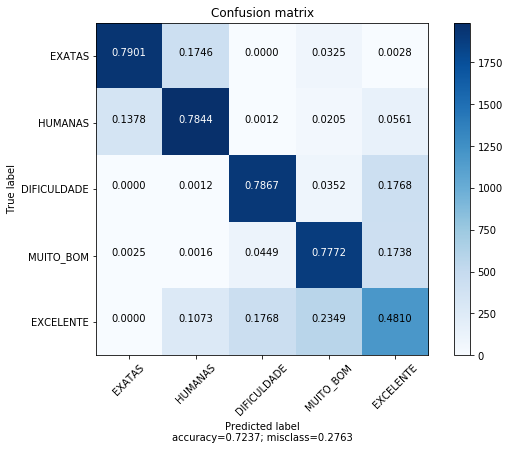

In [81]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred_rn), ['EXATAS', 'HUMANAS', 'DIFICULDADE', 'MUITO_BOM', 'EXCELENTE'])

<hr>

### Criação do vetor com as configurações ideias de cada um dos algoritmos

In [82]:
names = ["Decision_Tree", "Random_Forest", "XGBoost" "Logistic_Regression", "SVM",
         "kNN", "Neural_Networks"]

classifiers = [decision_tree, random_forest, xg, reg, svm, knn, rn]

In [83]:
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    scores.append(score)

[21:50:54] WARNING: ../src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [84]:
df = pd.DataFrame()
df['Name'] = names
df['Score'] = scores

### Resultados finais

In [85]:
cm = sns.light_palette('g', as_cmap=True)
s = df.style.background_gradient(cmap = cm)
s

,Name,Score
0,Decision_Tree,0.794087
1,Random_Forest,0.877845
2,XGBoostLogistic_Regression,0.866262
3,SVM,0.621223
4,kNN,0.717618
5,Neural_Networks,0.831673


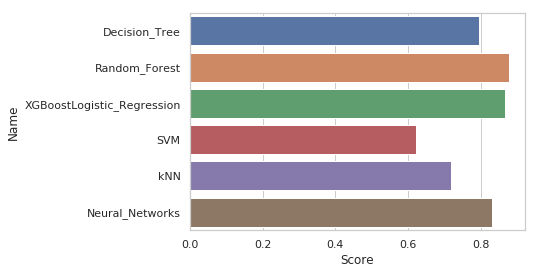

In [86]:
sns.set(style= 'whitegrid')
ax = sns.barplot(y = 'Name', x = 'Score', data = df)

Com isso, podemos observar que o algoritmo Random Forest teve o melhor desempenho dentre os outros algoritmos (apenas em termos de accurácia), claro que outros testes deveriam ser feitos, porém optei por escolha própria o Random Forest

## Treino e teste do algoritmo Random Forest com kFold

In [87]:
resultados10 = []
for i in range(10):
    kfold = StratifiedKFold(n_splits=5, shuffle = True, random_state= i)
    resultados = []
    for indice_treinamento, indice_teste in kfold.split(X, np.zeros(shape=(X.shape[0], 1))):
        # model definition
        rf_final = RandomForestClassifier(n_estimators=100, max_depth=110, max_features=3, criterion='entropy')

        # training model
        rf_final.fit(X[indice_treinamento], y[indice_treinamento])

        # prediction
        pred_final = rf_final.predict(X[indice_teste])
        precisao = accuracy_score(y[indice_teste], pred_final)
        resultados.append(precisao)
    resultados = np.asarray(resultados)
    media = resultados.mean()
    resultados10.append(media)

In [88]:
resultados10 = np.asarray(resultados10)
for i in range(resultados10.size):
    print(str(str(resultados10[i]).replace('.', ',')))

0,8875334143377887
0,8878493317132442
0,8880923450789794
0,8866342648845688
0,8878979343863913
0,8877764277035236
0,887411907654921
0,8863426488456867
0,8869744835965978
0,8849817739975698


<hr>

## Scoring dos dados necessários para entregar a solução

### Download da "folha de respostas"

In [89]:
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset-uninassau/master/to_be_scored_uninassau.csv
df_to_be_scored = pd.read_csv(r'to_be_scored_uninassau.csv')
df_to_be_scored.tail()

--2020-09-20 22:00:34--  https://raw.githubusercontent.com/vanderlei-test/dataset-uninassau/master/to_be_scored_uninassau.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.48.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.48.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32172 (31K) [text/plain]
Saving to: ‘to_be_scored_uninassau.csv.1’

100%[======================================>] 32,172      --.-K/s   in 0.002s  

2020-09-20 22:00:34 (16.8 MB/s) - ‘to_be_scored_uninassau.csv.1’ saved [32172/32172]



,MATRICULA,NOME,REPROVACOES_DE,REPROVACOES_EM,REPROVACOES_MF,REPROVACOES_GO,NOTA_DE,NOTA_EM,NOTA_MF,NOTA_GO,INGLES,H_AULA_PRES,TAREFAS_ONLINE,FALTAS
495,940576,Samuel Bahia Cranulunan,0,0,0,0,6.3,5.3,7.0,5.6,1,4,0,8
496,682956,Samuel de Linhares,0,0,0,0,5.7,5.9,5.8,5.0,1,1,1,6
497,850896,Gigi Olga de Oliveira,0,0,0,0,6.7,7.1,5.7,6.3,0,16,6,3
498,525876,Marta Oaman,0,0,0,0,6.7,7.2,5.2,5.7,1,10,3,5
499,867666,Eliel Jardel da Costa Sanches,0,0,0,0,7.1,6.8,6.5,6.0,1,5,3,6


In [90]:
df_to_be_scored.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
MATRICULA         500 non-null int64
NOME              500 non-null object
REPROVACOES_DE    500 non-null int64
REPROVACOES_EM    500 non-null int64
REPROVACOES_MF    500 non-null int64
REPROVACOES_GO    500 non-null int64
NOTA_DE           500 non-null float64
NOTA_EM           500 non-null float64
NOTA_MF           500 non-null float64
NOTA_GO           500 non-null float64
INGLES            500 non-null int64
H_AULA_PRES       500 non-null int64
TAREFAS_ONLINE    500 non-null int64
FALTAS            500 non-null int64
dtypes: float64(4), int64(9), object(1)
memory usage: 54.8+ KB


Na célula abaixo, repetimos rapidamente os mesmos passos de pré-processamento usados no exemplo dado com árvore de decisão

In [91]:
# Aplicando a transformação ``DropColumns`` ao conjunto de dados base
rm_columns.fit(X=df_to_be_scored)

# Reconstruindo um DataFrame Pandas com o resultado da transformação
df_to_be_scored_2 = pd.DataFrame.from_records(
    data=rm_columns.transform(
        X=df_to_be_scored
    ),
)
df_to_be_scored_2 = pd.get_dummies(df_to_be_scored_2, columns=['INGLES'])

df_to_be_scored_2.tail()

,REPROVACOES_DE,REPROVACOES_EM,REPROVACOES_MF,REPROVACOES_GO,NOTA_DE,NOTA_EM,NOTA_MF,NOTA_GO,H_AULA_PRES,TAREFAS_ONLINE,FALTAS,INGLES_0,INGLES_1
495,0,0,0,0,6.3,5.3,7.0,5.6,4,0,8,0,1
496,0,0,0,0,5.7,5.9,5.8,5.0,1,1,6,0,1
497,0,0,0,0,6.7,7.1,5.7,6.3,16,6,3,1,0
498,0,0,0,0,6.7,7.2,5.2,5.7,10,3,5,0,1
499,0,0,0,0,7.1,6.8,6.5,6.0,5,3,6,0,1


<hr>

Pode ser verificado abaixo que as colunas da folha de resposta agora são idênticas às que foram usadas para treinar o modelo:

In [94]:
df_to_be_scored_2.columns

Index(['REPROVACOES_DE', 'REPROVACOES_EM', 'REPROVACOES_MF', 'REPROVACOES_GO',
       'NOTA_DE', 'NOTA_EM', 'NOTA_MF', 'NOTA_GO', 'H_AULA_PRES',
       'TAREFAS_ONLINE', 'FALTAS', 'INGLES_0', 'INGLES_1'],
      dtype='object')

In [95]:
df_training_dataset_2.columns

Index(['REPROVACOES_DE', 'REPROVACOES_EM', 'REPROVACOES_MF', 'REPROVACOES_GO',
       'NOTA_DE', 'NOTA_EM', 'NOTA_MF', 'NOTA_GO', 'H_AULA_PRES',
       'TAREFAS_ONLINE', 'FALTAS', 'PERFIL', 'INGLES_0.0', 'INGLES_1.0'],
      dtype='object')

### Executando as predições na "folha de respostas"

In [96]:
X_test = df_to_be_scored_2.iloc[:, 0:13].values

In [97]:
y_pred = rf_final.predict(X_test)
df_to_be_scored_2['target'] = y_pred
df_to_be_scored_2.tail()

,REPROVACOES_DE,REPROVACOES_EM,REPROVACOES_MF,REPROVACOES_GO,NOTA_DE,NOTA_EM,NOTA_MF,NOTA_GO,H_AULA_PRES,TAREFAS_ONLINE,FALTAS,INGLES_0,INGLES_1,target
495,0,0,0,0,6.3,5.3,7.0,5.6,4,0,8,0,1,HUMANAS
496,0,0,0,0,5.7,5.9,5.8,5.0,1,1,6,0,1,EXATAS
497,0,0,0,0,6.7,7.1,5.7,6.3,16,6,3,1,0,EXATAS
498,0,0,0,0,6.7,7.2,5.2,5.7,10,3,5,0,1,EXATAS
499,0,0,0,0,7.1,6.8,6.5,6.0,5,3,6,0,1,EXATAS


In [98]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='51f3ba83-2ca0-49e1-8005-d769dd74053c', project_access_token='p-fa42a3cf222681019ab27700d871863502c20b2e')
pc = project.project_context

### Salvando a folha de respostas como um arquivo .csv para ser submetido

In [99]:
project.save_data(file_name="results.csv", data=df_to_be_scored_2.to_csv(index=False))

{'file_name': 'results.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'desafio2uninassau-donotdelete-pr-jy1wojw4xqjzu2',
 'asset_id': '8cca4631-a3e0-436a-a590-4838d4718601'}